# Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

In [125]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(0)

# Number of samples
n_samples = 1000

# Create random feature data
X = np.random.rand(n_samples, 5)

# Create coefficients for our features
coefficients = np.array([1, 2, 3, 4, 5])

# Create target variable based on the coefficients and features
y = X.dot(coefficients)

# Combine features and target into a single DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y

# Print the first few rows of the DataFrame
print(df.head())
print(df.shape)



   feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.548814   0.715189   0.602763   0.544883   0.423655   8.085289
1   0.645894   0.437587   0.891773   0.963663   0.383442   9.968246
2   0.791725   0.528895   0.568045   0.925597   0.071036   7.611215
3   0.087129   0.020218   0.832620   0.778157   0.870012  10.088113
4   0.978618   0.799159   0.461479   0.780529   0.118274   7.674862
(1000, 6)


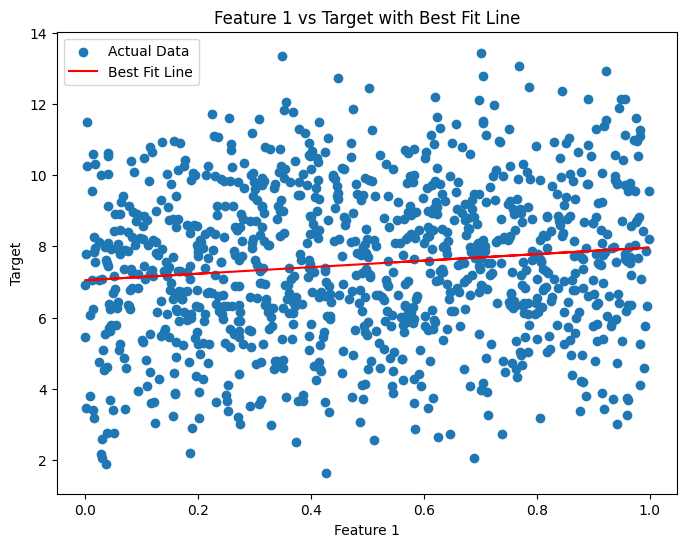

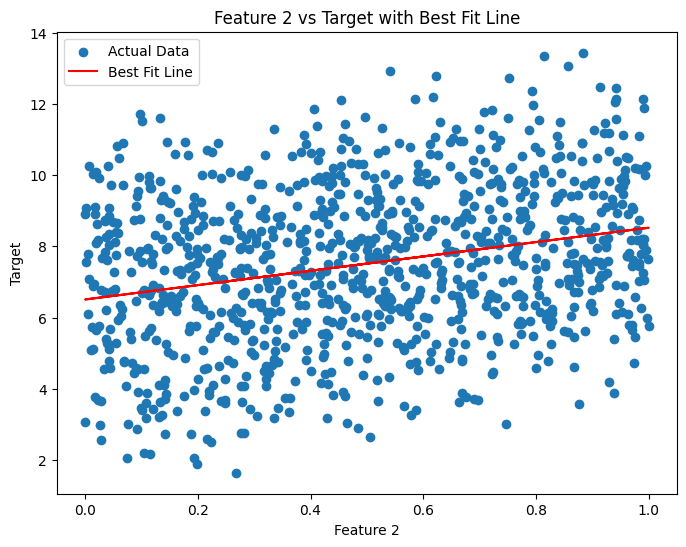

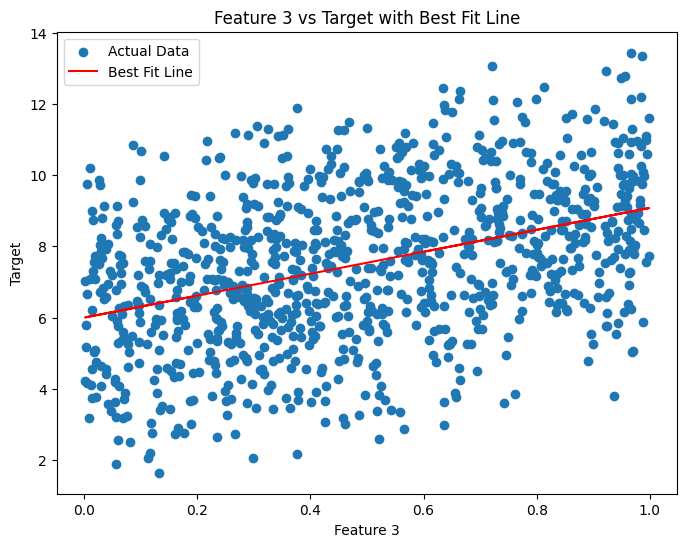

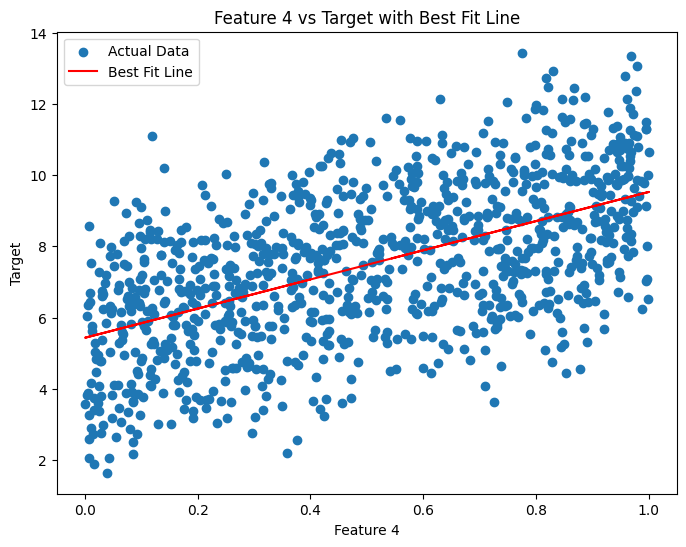

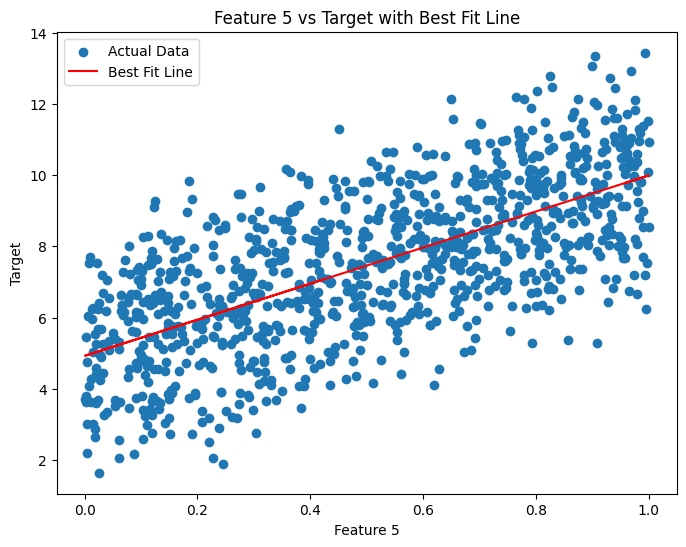

In [126]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(1, 6):
    # Extract feature and target
    feature = df[f'feature_{i}']
    target = df['target']

    # Use polyfit to fit a 1-degree polynomial (a line) to the data
    coefficients = np.polyfit(feature, target, deg=1)

    # Create a 1d polynomial function from the coefficients
    poly = np.poly1d(coefficients)

    # Create a new figure
    plt.figure(figsize=(8, 6))

    # Scatter plot of the actual data
    plt.scatter(feature, target, label='Actual Data')

    # Line plot of the best fit line
    plt.plot(feature, poly(feature), color='red', label='Best Fit Line')

    # Title and labels
    plt.title(f'Feature {i} vs Target with Best Fit Line')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target')

    # Legend location
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()


# Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

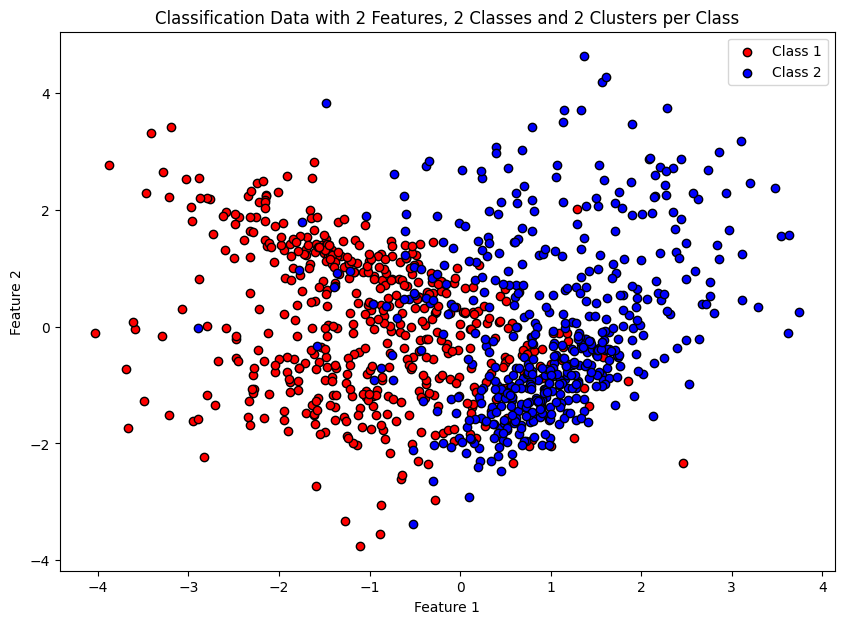

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, random_state=1)

# Visualize the data
plt.figure(figsize=(10, 7))

# Use a different color for each class
colors = ['red', 'blue']

for i, color in enumerate(colors):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=f'Class {i+1}', edgecolor='black')

plt.title('Classification Data with 2 Features, 2 Classes and 2 Clusters per Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Question 3:
Make a clustering dataset with 2 features and 4 clusters.

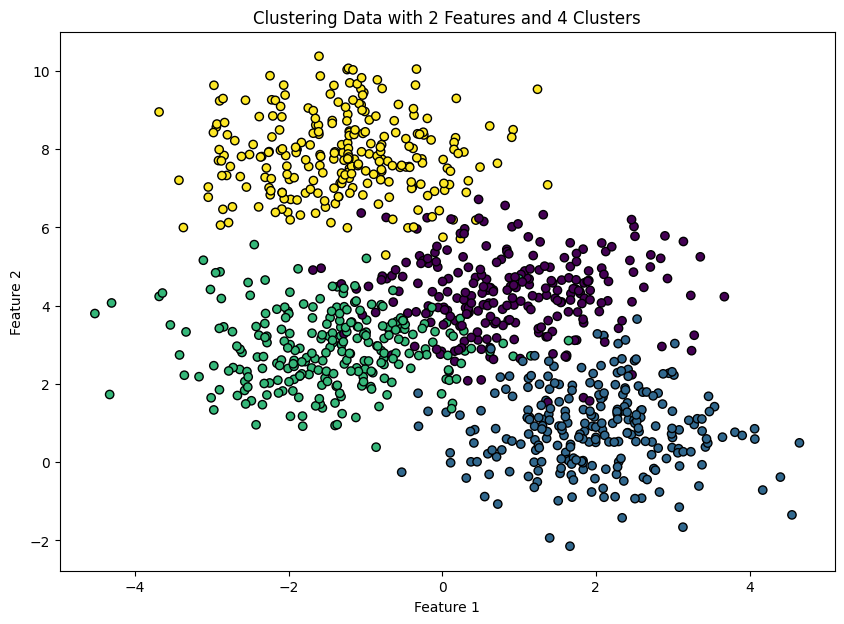

In [128]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate the dataset
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)

# Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Clustering Data with 2 Features and 4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [129]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Request the page
url = 'https://www.worldometers.info/coronavirus/'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

# Find the table
table = soup.find("table", attrs={"id": "main_table_countries_today"})

# Find all rows
table_data = table.tbody.find_all("tr") 

# Create a dictionary to hold the data
data = {
    'Country': [],
    'Population': [],
    'TotalCases': [],
    'NewCases': [],
    'TotalDeaths': [],
    'NewDeaths': [],
    'TotalRecovered': [],
    'NewRecovered': [],
    'ActiveCases': []
}

# Loop through each row
for row in table_data:
    cols = row.find_all('td')
    if cols[1].text.strip() not in data['Country']:
        data['Country'].append(cols[1].text.strip())
        data['Population'].append(cols[14].text.strip())
        data['TotalCases'].append(cols[2].text.strip())
        data['NewCases'].append(cols[3].text.strip())
        data['TotalDeaths'].append(cols[4].text.strip())
        data['NewDeaths'].append(cols[5].text.strip())
        data['TotalRecovered'].append(cols[6].text.strip())
        data['NewRecovered'].append(cols[7].text.strip())
        data['ActiveCases'].append(cols[8].text.strip())

# Create the dataframe
df = pd.DataFrame(data)

# Clean the data and convert to integers
for col in ['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']:
    df[col] = df[col].replace({',': '', '\+': '', 'N/A': '0'}, regex=True)  # Remove commas and plus signs
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, turning errors into NaN

# Print the dataframe
print(df.head())


         Country  Population  TotalCases  NewCases  TotalDeaths  NewDeaths  \
0  North America         NaN   126646637    1352.0    1632538.0        5.0   
1           Asia         NaN   217262442    4184.0    1546147.0       19.0   
2         Europe         NaN   249247757     337.0    2059482.0        1.0   
3  South America         NaN    68671718       NaN    1355254.0        NaN   
4        Oceania         NaN    14309490       9.0      27779.0        NaN   

   TotalRecovered  NewRecovered  ActiveCases  
0     122486652.0        1018.0      2527447  
1     200984533.0       24134.0     14731762  
2     245189392.0       13061.0      1998883  
3      66459408.0           NaN       857056  
4      14137852.0           7.0       143859  


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

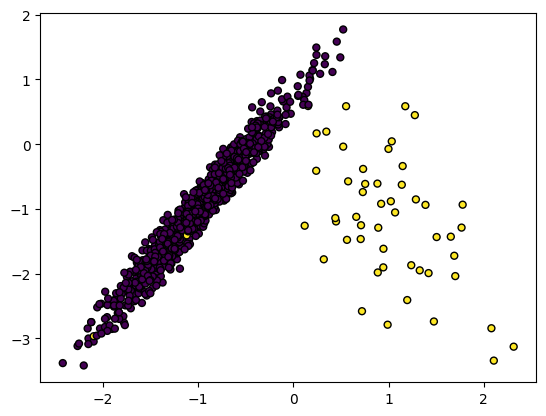

Original dataset shape: Counter({0: 945, 1: 55})


In [130]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# create dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, weights=[0.95])

# plot the dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

plt.show()

# confirm imbalance
print('Original dataset shape:', Counter(y))


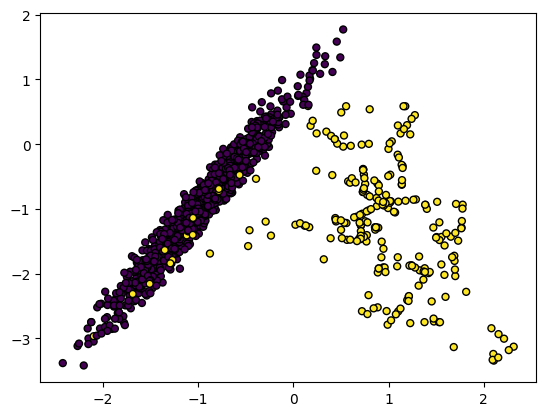

Resampled (SMOTE) dataset shape: Counter({0: 945, 1: 236})


In [131]:
# SMOTE
sm = SMOTE(sampling_strategy=0.25)
X_res, y_res = sm.fit_resample(X, y)

# plot the dataset after SMOTE
plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=25, edgecolor='k')

plt.show()

# confirm oversampling
print('Resampled (SMOTE) dataset shape:', Counter(y_res))


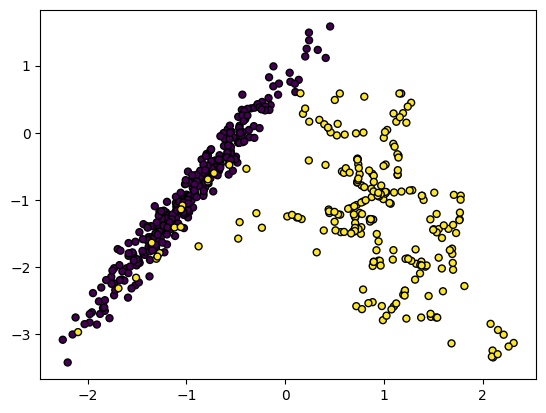

Resampled (RandomUnderSampler) dataset shape: Counter({0: 314, 1: 236})


In [132]:
# RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=3/4)
X_res_under, y_res_under = rus.fit_resample(X_res, y_res)

# plot the dataset after RandomUnderSampler
plt.scatter(X_res_under[:, 0], X_res_under[:, 1], marker='o', c=y_res_under,
            s=25, edgecolor='k')

plt.show()

# confirm undersampling
print('Resampled (RandomUnderSampler) dataset shape:', Counter(y_res_under))

# Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [133]:
# Import necessary modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Create DataFrame
df = pd.DataFrame(X, columns=data.feature_names)

# Display the first 5 rows of the DataFrame df
print(df.head())

# Check if there are any missing values in the DataFrame and handle them accordingly
if df.isnull().sum().sum() > 0:
    print("Found missing values!")
    df = df.fillna(df.mean())  # fill with mean of the column
else:
    print("No missing values found.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

# Print the dimensions of the training set and testing set respectively
print("Train set dimensions: ", X_train.shape)
print("Test set dimensions: ", X_test.shape)

# Standardize the feature data in the training set
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply the same scaling transformation on the testing set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Print the first 5 rows of the standardized training set
print(X_train_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
No missing values found.
Train set dimensions:  (105, 4)
Test set dimensions:  (45, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844           0.309096          0.217746
4           1.636440          1.416315           1.301427          1.705891
